<a href="https://colab.research.google.com/github/Saba-Tanveer-Khan/SMS_Spam_Classifier_Bharat_intern_Data-Science_Project/blob/main/SMS_SPAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Project Title - SMS Span Classifier ***

In [ ]:
import numpy as np
import pandas as pd
# importing libraries

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
# To read dataset

## **Information about the dataset**

In [ ]:
df.info()
# Gives information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.head()
# Prints first 5 rows of data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()
# Prints last 5 rows of data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape
# Show data size
# Format (columns,rows)

(5572, 5)

In [ ]:
df.sample(10)
# Some sample data from dataset(Picks random data)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1364,ham,Hey i will be really pretty late... You want t...,NaN,NaN,NaN
3583,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...,NaN,NaN,NaN
755,ham,So why didnt you holla?,NaN,NaN,NaN
5219,ham,Pls she needs to dat slowly or she will vomit ...,NaN,NaN,NaN
686,ham,Every King Was Once A Crying Baby And Every Gr...,NaN,NaN,NaN
897,ham,I'm used to it. I just hope my agents don't dr...,NaN,NaN,NaN
1110,ham,Ok ill tell the company,NaN,NaN,NaN
2548,ham,Honestly i've just made a lovely cup of tea an...,NaN,NaN,NaN
1617,ham,Did u download the fring app?,NaN,NaN,NaN
3272,ham,Just finished eating. Got u a plate. NOT lefto...,NaN,NaN,NaN


## **Step-1: Data Cleaning**

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# To drop last 3 columns
# Because there is no use of those columns due to many null values

In [ ]:
df.sample(5)

,v1,v2
32,ham,K tell me anything about you.
2556,ham,Fuck babe ... What happened to you ? How come ...
2277,ham,Hello! How r u? Im bored. Inever thought id ge...
4132,spam,FreeMsg Today's the day if you are ready! I'm ...
5449,spam,"Latest News! Police station toilet stolen, cop..."


In [ ]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
# To rename column names

In [ ]:
df.sample(5)

,Target,Text
4418,ham,How have your little darlings been so far this...
5065,ham,I calls you later. Afternoon onwords mtnl serv...
3764,spam,Someone U know has asked our dating service 2 ...
334,spam,Valentines Day Special! Win over å£1000 in our...
4680,ham,Are you staying in town ?


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# To change the column values from ham and spam to 0 and 1
# To perform the above operation we import LabelEncoder

In [ ]:
encoder.fit_transform(df['Target'])
# For assigning the values
# ham = 0 & spam = 1

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()
# Check for missing values

Target    0
Text      0
dtype: int64

In [ ]:
df.duplicated().sum()
# Check for duplicate values

403

In [ ]:
df.drop_duplicates(keep='first')
# Remove duplicate values

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape
# Cleaned Data

(5169, 2)

## **Step-2: Exploratory Data Analysis**

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.value_counts()

Target  Text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

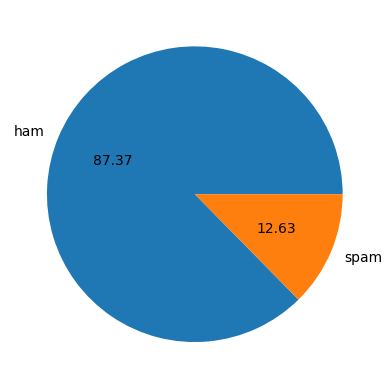

In [ ]:
import matplotlib.pyplot as plt
# To represent data in graphs we import matplotlib
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk
# To import nltk library we install nltk

In [ ]:
import nltk
# Natural language tool-kit
# To find how many characters , words, sentences in the SMS for that we need this library

In [ ]:
nltk.download('punkt')
# To run some commands of nltk we need to download punkt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Text'].apply(len)
# It shows the length of the messages

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [ ]:
df['no.of.Characters'] = df['Text'].apply(len)
# It adds a column known as number of characters which prints total characters in a message

In [ ]:
df.head()

,Target,Text,no.of.Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['no.of.Words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
# It adds a column known as number of Words which prints total words in a message

In [ ]:
df.head()

,Target,Text,no.of.Characters,no.of.Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['no.of.Sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# It adds a column known as number of Sentences which prints total sentences in a message

In [ ]:
df.head()

,Target,Text,no.of.Characters,no.of.Words,no.of.Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['no.of.Characters','no.of.Words','no.of.Sentences']].describe()
# To find overall details about data

,no.of.Characters,no.of.Words,no.of.Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target']==0][['no.of.Characters','no.of.Words','no.of.Sentences']].describe()
# To analyse ham messages

,no.of.Characters,no.of.Words,no.of.Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Target']==1][['no.of.Characters','no.of.Words','no.of.Sentences']].describe()
# To analyse spam messages

,no.of.Characters,no.of.Words,no.of.Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns
# To analyze the data through plot we import seaborn library

<Axes: xlabel='no.of.Characters', ylabel='Count'>

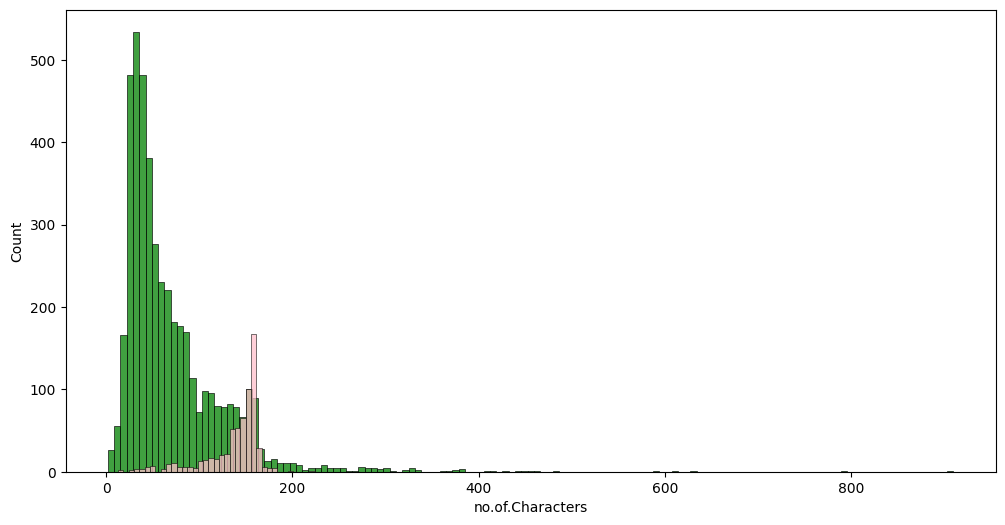

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['no.of.Characters'],color='green')
sns.histplot(df[df['Target']==1]['no.of.Characters'],color='pink')
# It plots no.of.characters and the count of both ham and spam (green-ham , pink-spam)

<Axes: xlabel='no.of.Words', ylabel='Count'>

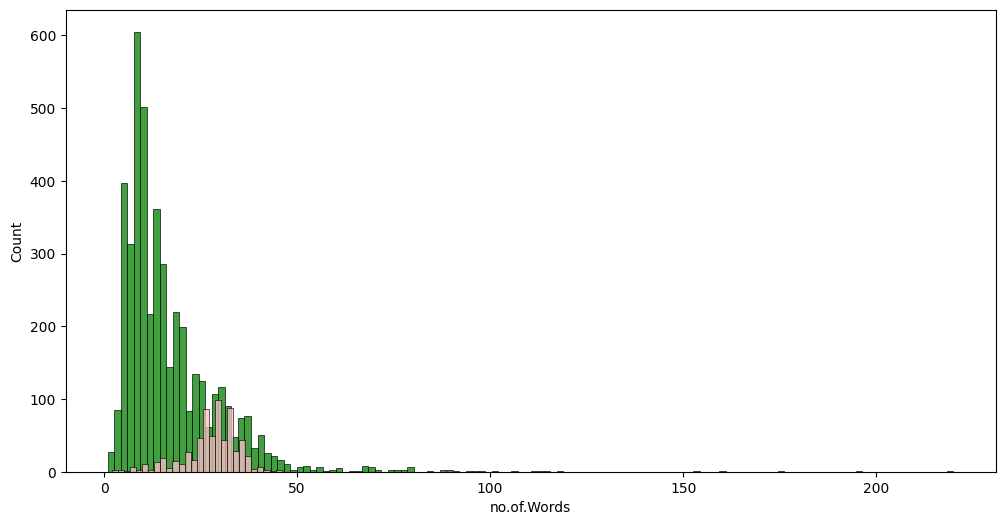

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['no.of.Words'],color='green')
sns.histplot(df[df['Target']==1]['no.of.Words'],color='pink')
# It plots no.of.Words and the count of both ham and spam (green-ham , pink-spam)

<Axes: xlabel='no.of.Sentences', ylabel='Count'>

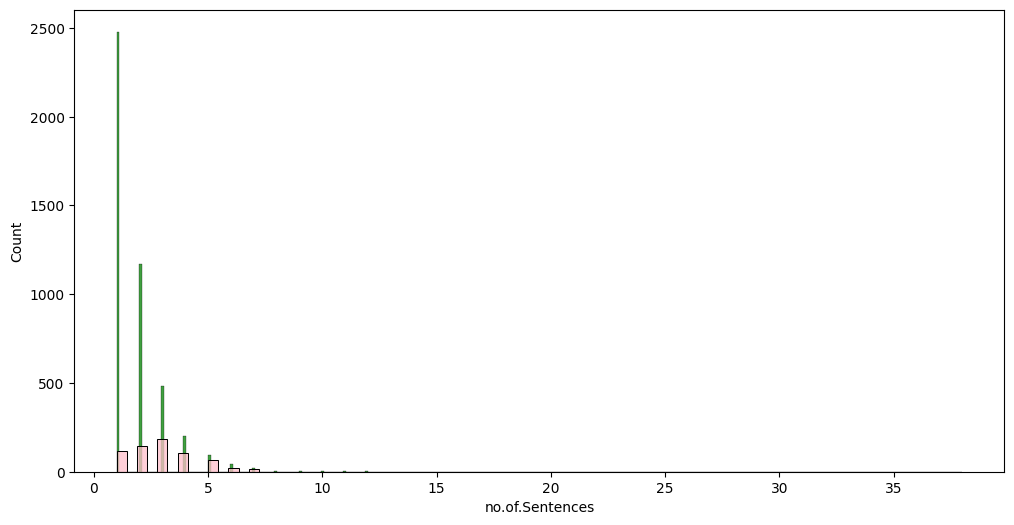

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['no.of.Sentences'],color='green')
sns.histplot(df[df['Target']==1]['no.of.Sentences'],color='pink')
# It plots no.of.Sentences and the count of both ham and spam (green-ham , pink-spam)

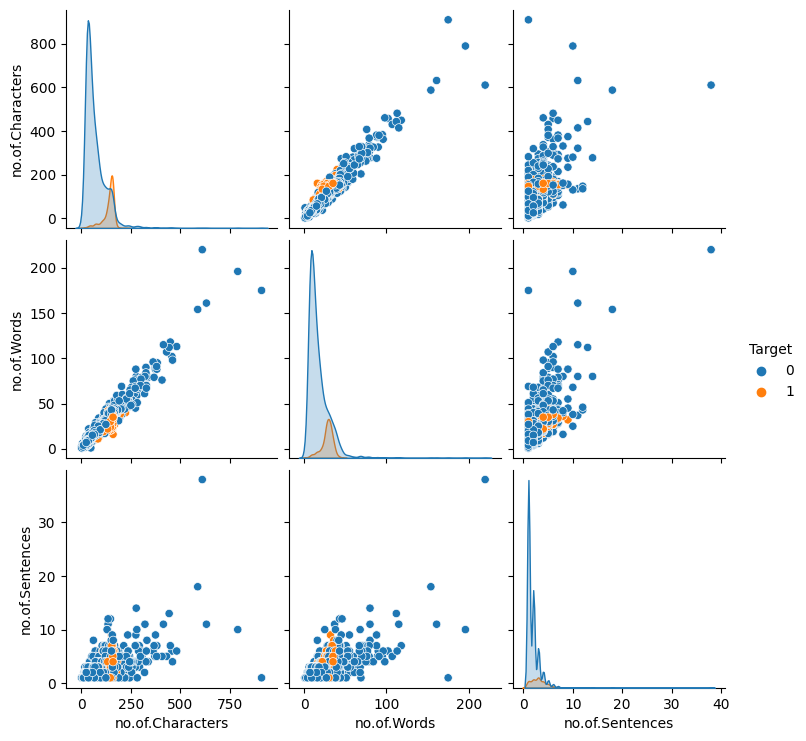

In [ ]:
sns.pairplot(df,hue='Target')
# Relation between no.of.Characters, no.of.words, no.of.sentences
#no.of.character-no.of.Sentence,no.of.Character-no.of.Words,no.of.Character-no.of.Character
#no.of.Words-no.of.Sentence,no.of.Words-no.of.Words,no.of.Words-no.of.Character
#no.of.Sentences-no.of.Sentence,no.of.Sentences-no.of.Words,no.of.Sentences-no.of.Character

In [ ]:
df.corr()
# To find co-relation co-efficient

<ipython-input-66-ba21c90154bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,no.of.Characters,no.of.Words,no.of.Sentences
Target,1.000000,0.384717,0.262912,0.263939
no.of.Characters,0.384717,1.000000,0.965760,0.624139
no.of.Words,0.262912,0.965760,1.000000,0.679971
no.of.Sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-68-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

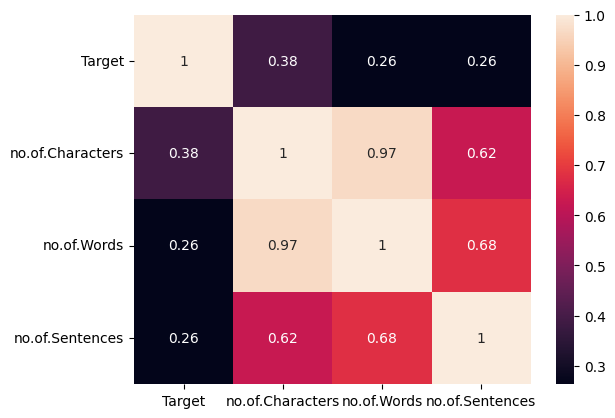

In [ ]:
sns.heatmap(df.corr(),annot=True)
# Visual view of co-relation co-efficent

## **Step-3: Text/Data Preprocessing**

In [ ]:
def transform_text(Text):
# To covert text into lower case
  Text = Text.lower()
# To tokenize text
  Text = nltk.word_tokenize(Text)
# To remove Special characters from text
  y = []
  for i in Text:
    if i.isalnum():
      y.append(i)
  Text = y[:]
  y.clear()
# To remove stopwords and punchuations from text
  for i in Text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  Text = y[:]
  y.clear()
# To perform Stemming
  for i in Text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la ebuffet... Cine there got amore wat...")
# Perform all data/text prepocessing

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Studying')
# To perform Stemming (it brings the words to it's root form)
# To perform this operation import PorterStemmer from nltk.stem.porter

'studi'

In [ ]:
df["Transformed_Text"]=df['Text'].apply(transform_text)
# Apply the transform_text function to dataset and adding one new column
# The column known as Transformed_Text

In [ ]:
df.head()

,Target,Text,no.of.Characters,no.of.Words,no.of.Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=600, min_font_size=10, background_color='black')
# To genarate  Word cloud of spam messages
# to genrate this import WordCloud
# WordCloud shows the important words in a big size

In [ ]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep=" "))
# By using wc we use function known as generate for spam messages

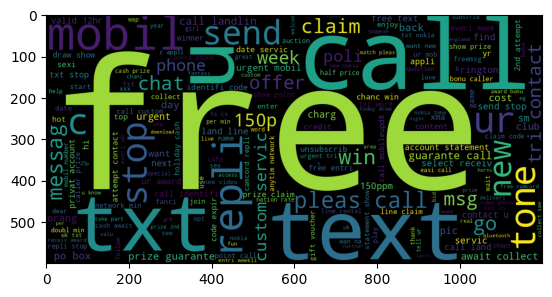

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_Text'].str.cat(sep=" "))
# By using wc we use function known as generate for ham messages

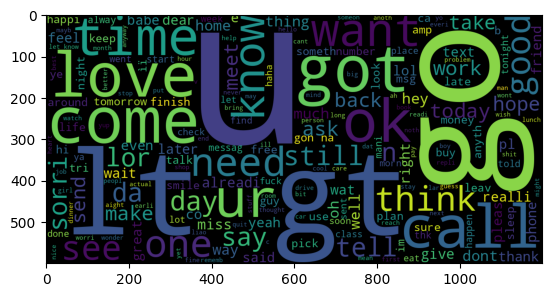

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_Text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
# To extract all the spam messages and from that extract Transformed_Text column
# Covert Transformed_Text into list of strings
# 1st for loop for printing all spam messages
# 2nd for loop for spliting

In [ ]:
len(spam_corpus)
# Total no.of words of spam messages

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(15)
# To get information that which word used how many times in spam
# To get this information import counter
# most_common(30) means it shows mostly used 30 words

[('u', 1885),
 ('go', 840),
 ('call', 786),
 ('get', 772),
 ('2', 723),
 ('gt', 576),
 ('lt', 574),
 ('come', 555),
 ('ur', 513),
 ('know', 491),
 ('like', 480),
 ('got', 478),
 ('time', 456),
 ('want', 447),
 ('love', 442)]

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(15))
# Adding above information to a dataframe

,0,1
0,u,1885
1,go,840
2,call,786
3,get,772
4,2,723
5,gt,576
6,lt,574
7,come,555
8,ur,513
9,know,491


In [ ]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_Text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
# To extract all the ham messages and from that extract Transformed_Text column
# Covert Transformed_Text into list of strings
# 1st for loop for printing all ham messages
# 2nd for loop for spliting

In [ ]:
len(ham_corpus)
# Total no.of words of ham messages

35404

In [ ]:
Counter(ham_corpus).most_common(15)
# To get information that which word used how many times in ham
# To get this information import counter
# most_common(30) means it shows mostly used 30 words

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213)]

In [ ]:
pd.DataFrame(Counter(ham_corpus).most_common(15))
# Adding above information to a dataframe

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


## **Step-4: Model Building**

In [ ]:
df.head()

,Target,Text,no.of.Characters,no.of.Words,no.of.Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# To vectorize the data using bag of words for this imporrt CountVectorizer
# If we want we use TfidfVectorizer instead of CountVectorizer

In [ ]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [ ]:
X.shape
#(sms,words)

(5169, 3000)

In [ ]:
Y = df['Target'].values
# To extract in y

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
# To apply train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
# To train and test data

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# importing navie bayes
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# To use some metrices import the above mentioned library

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
# Creating objects for naive bayes

In [ ]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print("Accuracy_score: ",accuracy_score(Y_test,Y_pred1))
print("Confusion_matrix: ",confusion_matrix(Y_test,Y_pred1))
print("Precision_score: ",precision_score(Y_test,Y_pred1))
# To check the values of Gaussian navie bayes

Accuracy_score:  0.8694390715667312
Confusion_matrix:  [[788 108]
 [ 27 111]]
Precision_score:  0.5068493150684932


In [ ]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print("Accuracy_score: ", accuracy_score(Y_test,Y_pred2))
print("Confusion_matrix: ",confusion_matrix(Y_test,Y_pred2))
print("Precision_score: ",precision_score(Y_test,Y_pred2))
# To check the values of Multinomial navie bayes

Accuracy_score:  0.9709864603481625
Confusion_matrix:  [[896   0]
 [ 30 108]]
Precision_score:  1.0


In [ ]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print("Accuracy_score: ", accuracy_score(Y_test,Y_pred3))
print("Confusion_matrix: ",confusion_matrix(Y_test,Y_pred3))
print("Precision_score: ",precision_score(Y_test,Y_pred3))
# To check the values of Bernoulli navie bayes

Accuracy_score:  0.9835589941972921
Confusion_matrix:  [[895   1]
 [ 16 122]]
Precision_score:  0.991869918699187


In [ ]:
# Here we select tfidf --> mnb because in multinomial naive bayers precision score is good

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# To use Machine learning algorithms we need to import these all libraries

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

# Set all the libraries to objects

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

#  Create a Dictionary where key consists of algorithm_name and value consists of object

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
# To train and test the data we use a function known as train_classifier()
# Calculate Accuracy and Precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)
# Example for the above mentioned function

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
# The loop runs on clfs dictonary
# loop will select one algorithm , train the model and store accuracy and precision
# Same Process repeats for all algorithms

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
# Coverting the accuracy and precision into dataframe known as performance_df

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.929400
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.975822
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.958414
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.946809


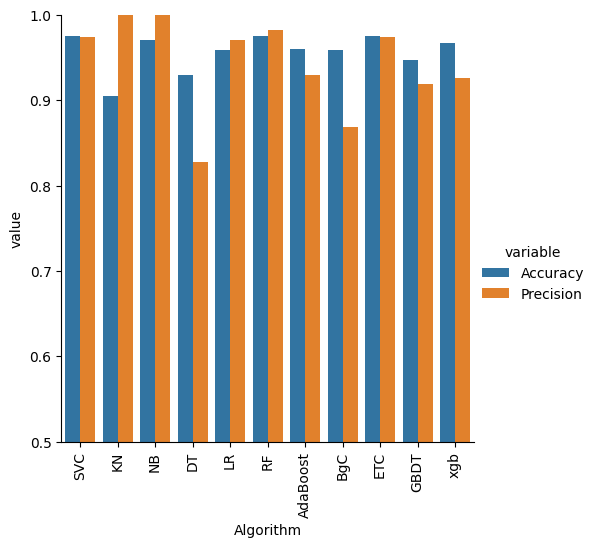

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# To improve Model
# step-1: Change the max_features parameter of tfidf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})
# with max_features(3000)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})
# without max_features(3000)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
# To merge temp_df

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
# To merge new_df

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
# Voting Classifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
# To apply stack

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [242]:
!git clone https://github.com/Saba-Tanveer-Khan/SMS_Spam_Classifier_Bharat_intern_Data-Science_Project

Cloning into 'SMS_Spam_Classifier_Bharat_intern_Data-Science_Project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.
